In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [3]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
data.drop(columns=["timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers', 'csi_len', 'channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'payload_length', 'block_length', 'with_receiver'], axis=1, inplace=True)

# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude'], inplace=True)

In [4]:
data.drop(columns=['coord1', 'coord2'], inplace=True)

In [5]:
features = data.columns
X = data[features]

scaler = StandardScaler()

X[features] = scaler.fit_transform(X[features])

In [7]:
for i in range(1, X.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.85):
        break

X_pca = pca.fit_transform(X)

PCA with 1 components, sum is 0.2844506688743796.
PCA with 2 components, sum is 0.49794939484823453.
PCA with 3 components, sum is 0.6199546345990494.
PCA with 4 components, sum is 0.7357821258997742.
PCA with 5 components, sum is 0.8360350373536595.
PCA with 6 components, sum is 0.9319227408563877.


In [9]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.28445067 0.21349873 0.12200524 0.11582749 0.10025291 0.0958877 ]


In [10]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [11]:
print(features)

Index(['rate', 'nc', 'rssi', 'rssi1', 'rssi2', 'ant1_phase', 'ant2_phase',
       'ant1_amplitude_cluster', 'ant2_amplitude_cluster'],
      dtype='object')


In [12]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


       rate        nc      rssi     rssi1     rssi2  ant1_phase  ant2_phase  \
0 -0.215679 -0.158964  0.588392  0.498456  0.565526    0.001230    0.000897   
1  0.623311  0.662117  0.183422  0.131936  0.178789   -0.005930    0.000402   
2  0.006053  0.004849 -0.002254  0.005917 -0.003723    0.707257    0.706802   
3 -0.231774 -0.115484 -0.001953  0.063831 -0.018810    0.005028    0.002679   
4 -0.013223 -0.010872  0.005848 -0.021139  0.011703   -0.704927    0.706538   
5 -0.147353 -0.145266  0.033686 -0.080938  0.056671    0.049734   -0.033894   

   ant1_amplitude_cluster  ant2_amplitude_cluster  
0               -0.107401               -0.046821  
1                0.281155                0.104808  
2               -0.010155                0.000765  
3                0.451945                0.851015  
4                0.047605               -0.026560  
5                0.834706               -0.495915  


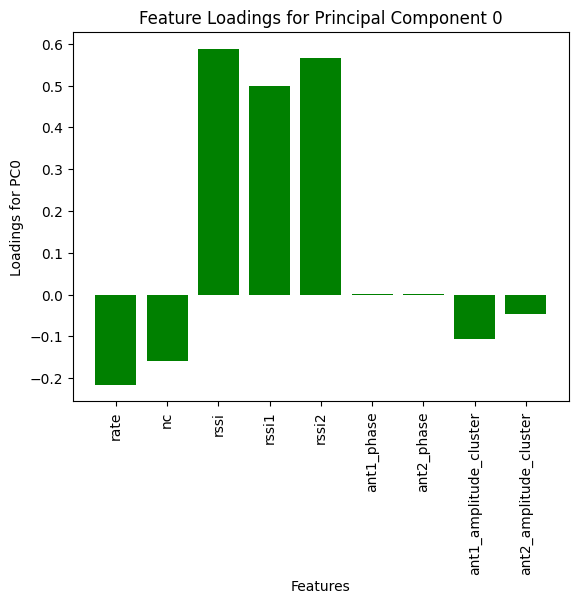

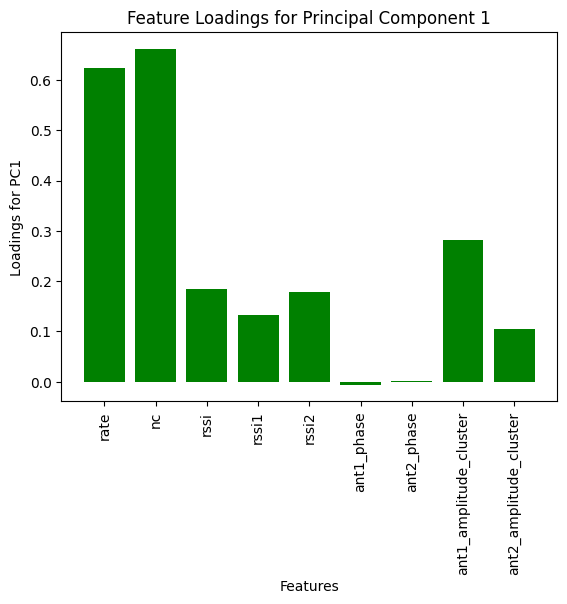

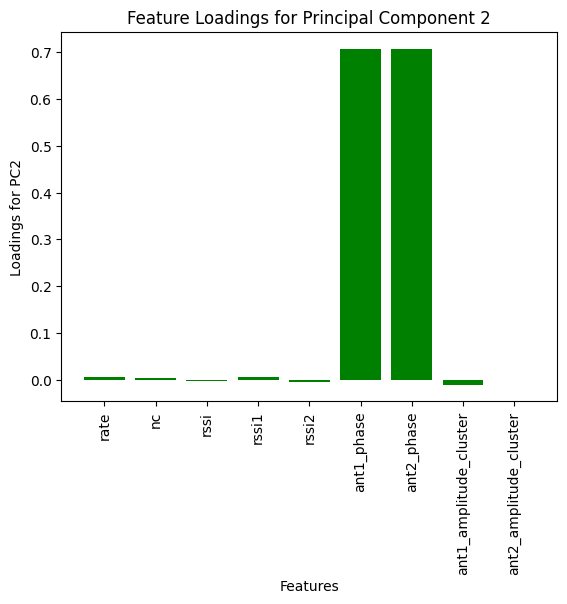

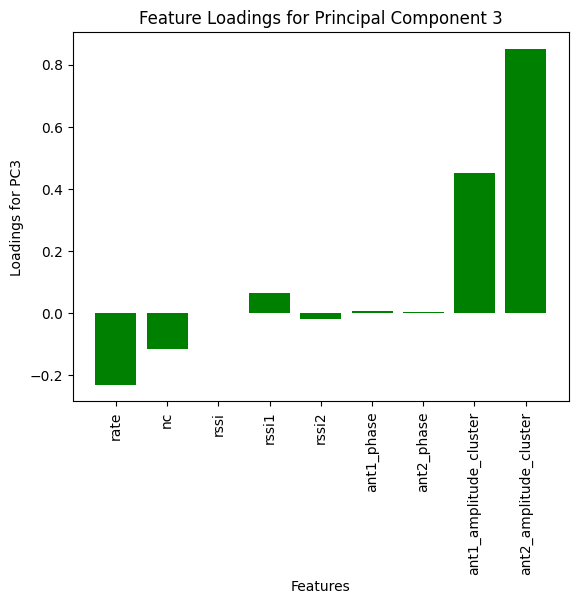

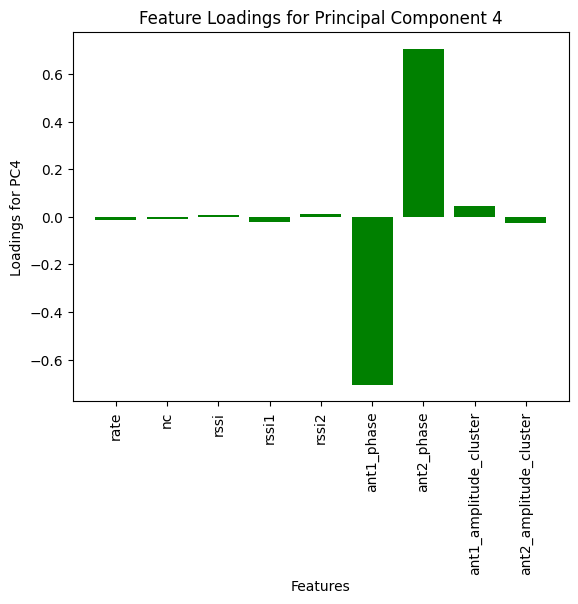

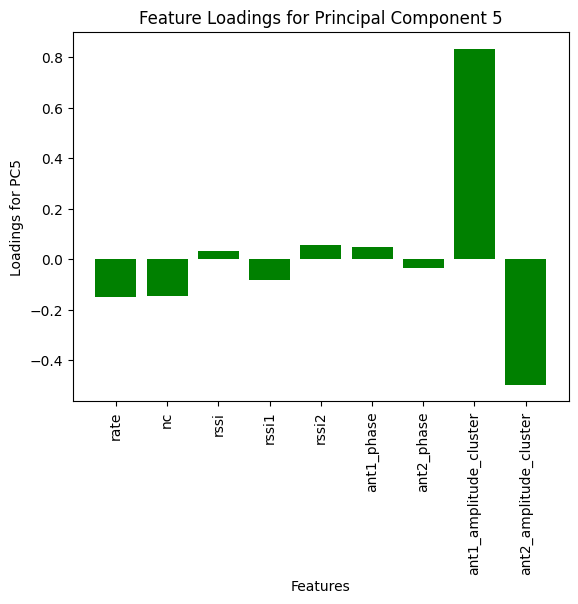

In [13]:
for j in range(i):
    plt.bar(features, loadings[j], color='g')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{j}')
    plt.title(f'Feature Loadings for Principal Component {j}')
    plt.show()


In [14]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.28445067 0.49794939 0.61995463 0.73578213 0.83603504 0.93192274]


In [17]:
pca = PCA(n_components=i)
X_reduced = pca.fit_transform(X)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [0.28445067 0.21349873 0.12200524 0.11582749 0.10025291 0.0958877 ]
SUM: 0.9319227408563877


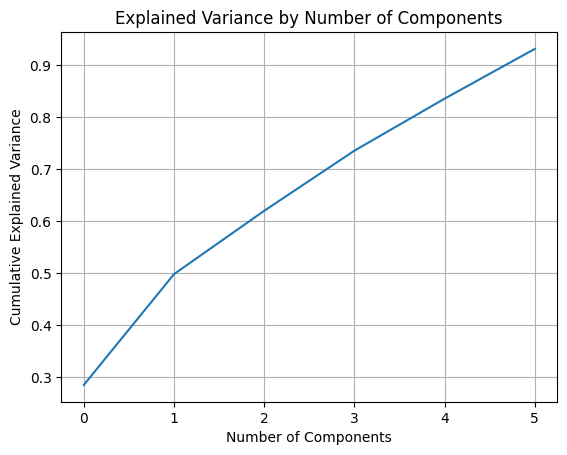

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [19]:
# Remove exact duplicates
# df = pd.DataFrame(X_reduced)
# X_reduced_deduped = df.drop_duplicates()
